<a href="https://colab.research.google.com/github/TugcenB/Sound_Classification/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building Convolutional Neural Network

##Import Required Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

##Prepare The Dataset

We already prepared X_train, y_train, X_val, y_val, X_test ve y_test dataset in Preprocessing 

In [3]:
X_train = np.load('/content/drive/MyDrive/X_train_cv.npy')
X_test = np.load('/content/drive/MyDrive/X_test_cv.npy')
X_val = np.load('/content/drive/MyDrive/X_val_cv.npy')

y_train = pd.read_csv('/content/drive/MyDrive/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test.csv')
y_val = pd.read_csv('/content/drive/MyDrive/y_val.csv')

In [4]:
X_train = np.array(X_train)
y_train = np.array(y_train['1'])

X_val = np.array(X_val)
y_val = np.array(y_val['1'])

X_test = np.array(X_test)
y_test = np.array(y_test['1'])


In [5]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

5238
5238
1747
1747
1747
1747


In [6]:
X_train = X_train.reshape(-1, 32, 32, 3) 
X_val = X_val.reshape(-1, 32, 32, 3) 
X_test = X_test.reshape(-1, 32, 32, 3) 

##Constructing Neural Network

In [7]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(2,2),
                                 padding="same",
                                 activation="relu",
                                 ))
model.add(tf.keras.layers.Flatten())


model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [9]:
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [10]:
results = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_val, y_val)
                    )

Epoch 1/20
164/164 [==============================] - 22s 127ms/step - loss: 2.2348 - accuracy: 0.1476 - val_loss: 1.9582 - val_accuracy: 0.2959
Epoch 2/20
164/164 [==============================] - 16s 98ms/step - loss: 1.8887 - accuracy: 0.3169 - val_loss: 1.7525 - val_accuracy: 0.4156
Epoch 3/20
164/164 [==============================] - 18s 109ms/step - loss: 1.7099 - accuracy: 0.3793 - val_loss: 1.4619 - val_accuracy: 0.4665
Epoch 4/20
164/164 [==============================] - 16s 100ms/step - loss: 1.5618 - accuracy: 0.4416 - val_loss: 1.3182 - val_accuracy: 0.5455
Epoch 5/20
164/164 [==============================] - 16s 97ms/step - loss: 1.4302 - accuracy: 0.5059 - val_loss: 1.2138 - val_accuracy: 0.6045
Epoch 6/20
164/164 [==============================] - 16s 100ms/step - loss: 1.3573 - accuracy: 0.5202 - val_loss: 1.1096 - val_accuracy: 0.6463
Epoch 7/20
164/164 [==============================] - 16s 97ms/step - loss: 1.2600 - accuracy: 0.5628 - val_loss: 1.0273 - val_accur

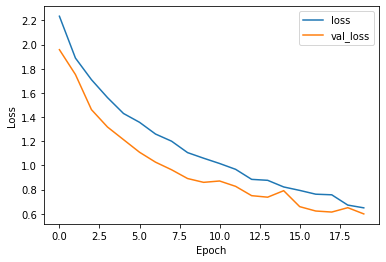

In [11]:

plt.plot(results.history["loss"], label="loss")

plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

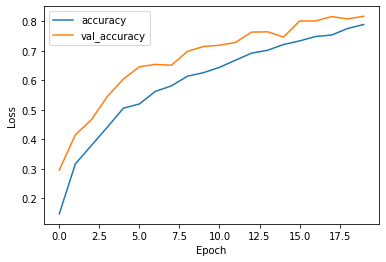

In [12]:
plt.plot(results.history["accuracy"], label="accuracy")

plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

In [13]:
result = model.evaluate(X_test, y_test)
print(f"Loss: {result[0]} - Accuracy: {result[1]}")

55/55 [==============================] - 1s 25ms/step - loss: 0.6343 - accuracy: 0.8140
Loss: 0.6343299150466919 - Accuracy: 0.8139668107032776


In [14]:
prediction_result = model.predict(X_test[789].reshape(1,32,32,3))
predicted_class= prediction_result.argmax()
predicted_probability = prediction_result.max()
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 6 with 0.9999947547912598 probability %
